<a href="https://colab.research.google.com/github/Silva-TI/MachineLearning-Silva/blob/main/Latihan_5_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
path = "/content/gdrive/MyDrive/Nurulfikri/Laptop/SEM 3/Machine Learning/Praktikum ml/Praktikum 5"

In [6]:
import pandas as pd

df = pd.read_csv(path + '/Data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df = df.rename(columns={
    'SepalLengthCm': 'panjang_kelopak_cm',
    'SepalWidthCm': 'lebar_kelopak_cm',
    'PetalLengthCm': 'panjang_mahkota_cm',
    'PetalWidthCm': 'lebar_mahkota_cm',
    'Species': 'spesies'
})

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  150 non-null    int64  
 1   panjang_kelopak_cm  150 non-null    float64
 2   lebar_kelopak_cm    150 non-null    float64
 3   panjang_mahkota_cm  150 non-null    float64
 4   lebar_mahkota_cm    150 non-null    float64
 5   spesies             150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


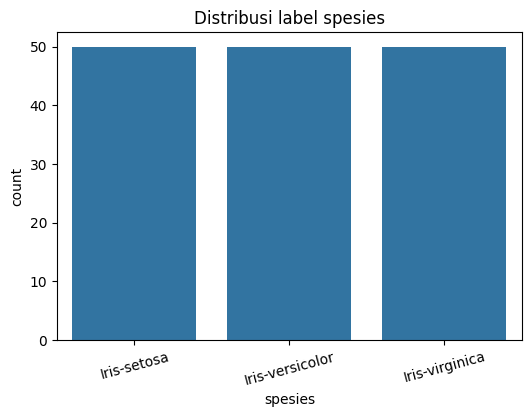

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x='spesies', data=df)
plt.title('Distribusi label spesies')
plt.xticks(rotation=15)
plt.show()

In [15]:
# Encoding kolom target 'spesies'
spesies_cat = df['spesies'].astype('category')
spesies_classes = list(spesies_cat.cat.categories)
df['spesies_encoded'] = spesies_cat.cat.codes

# Kolom kategorikal fitur yang perlu di-encode (List ini kosong karena semua fitur Iris sudah numerik)
kolom_kategorikal_fitur = []

for col in kolom_kategorikal_fitur:
  if col in df.columns:
    df[col] = df[col].astype('category').cat.codes

# Bersihkan kolom 'spesies' asli dan ganti nama kolom encoded
df = df.drop(columns=['spesies'])
df.rename(columns={'spesies_encoded': 'spesies'}, inplace=True)

df.head()

,Id,panjang_kelopak_cm,lebar_kelopak_cm,panjang_mahkota_cm,lebar_mahkota_cm,spesies
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


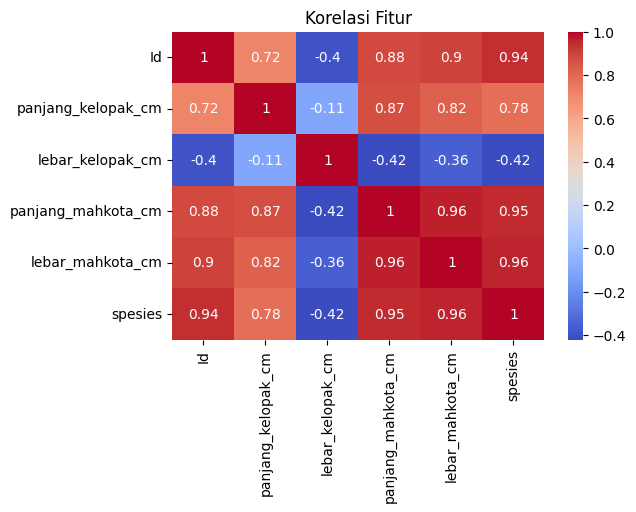

In [16]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur')
plt.show()

In [17]:
X = df[['panjang_kelopak_cm', 'panjang_mahkota_cm', 'lebar_mahkota_cm']]
y = df['spesies']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
len(X_train), len(X_test)

(120, 30)

In [18]:
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [19]:
# Model kita diberi nama 'dt'
y_pred = dt.predict(X_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
# Menggunakan nama kelas 'spesies_classes'
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=spesies_classes))

Akurasi: 93.33 %

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



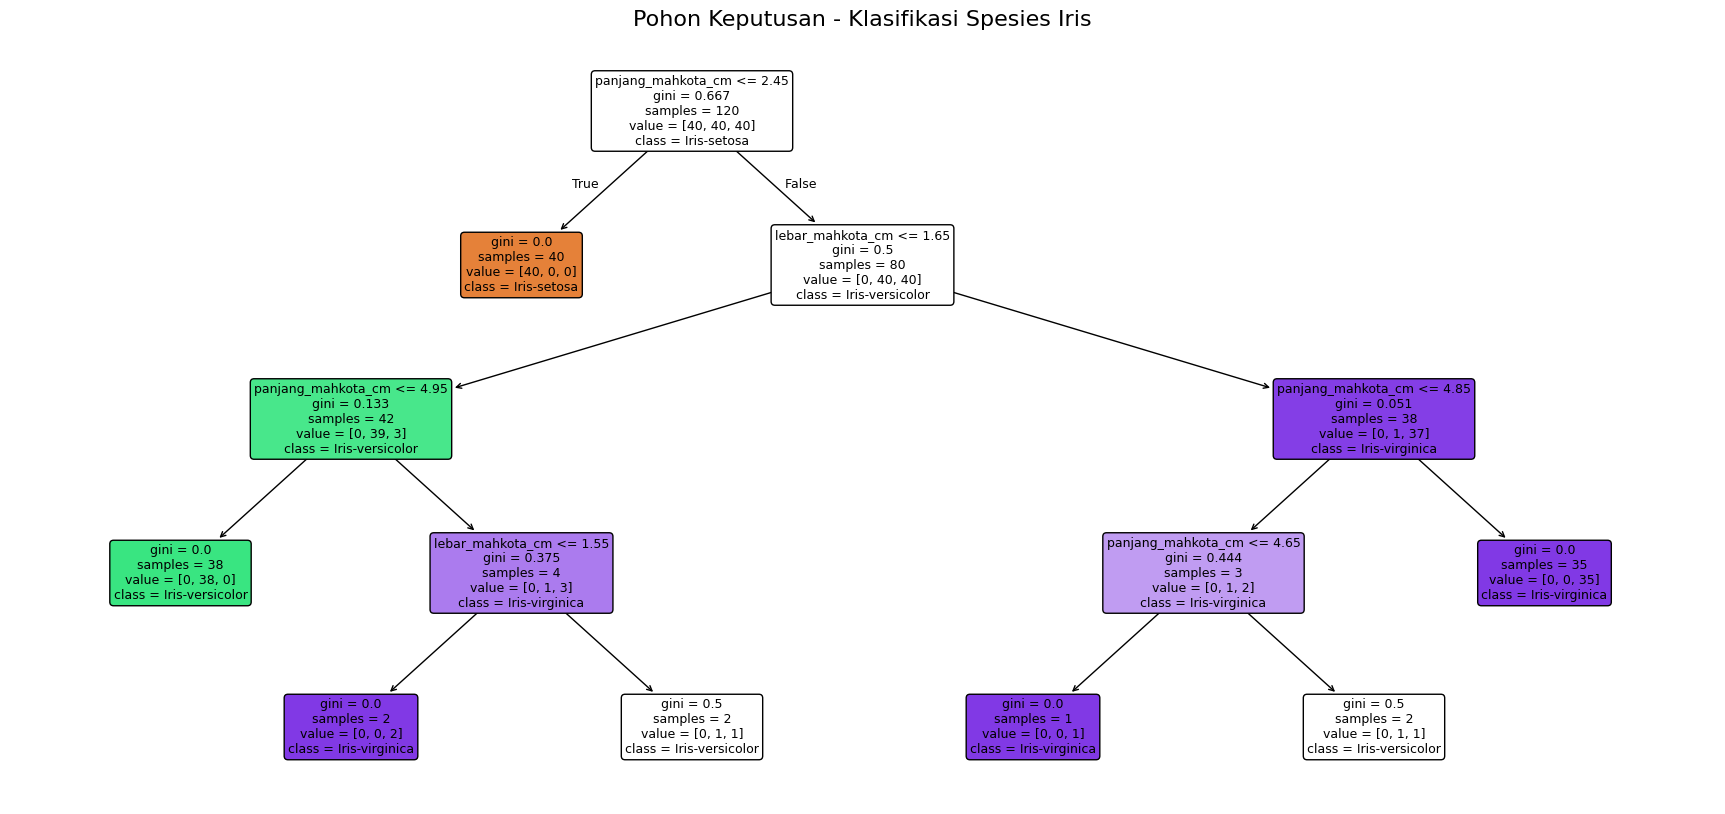

In [20]:
plt.figure(figsize=(22,10))

# Define feature_names from the training data columns
feature_names = X_train.columns.tolist()

plot_tree(
    dt, # Model Decision Tree yang sudah dilatih
    feature_names=feature_names, # List nama fitur (panjang_kelopak_cm, dll.)
    class_names=spesies_classes, # List nama kelas target ('Iris-setosa', dll.)
    filled=True,
    fontsize=9,
    rounded=True # Tambahkan rounded agar kotak lebih bagus
)
plt.title("Pohon Keputusan - Klasifikasi Spesies Iris", fontsize=16)
plt.show()

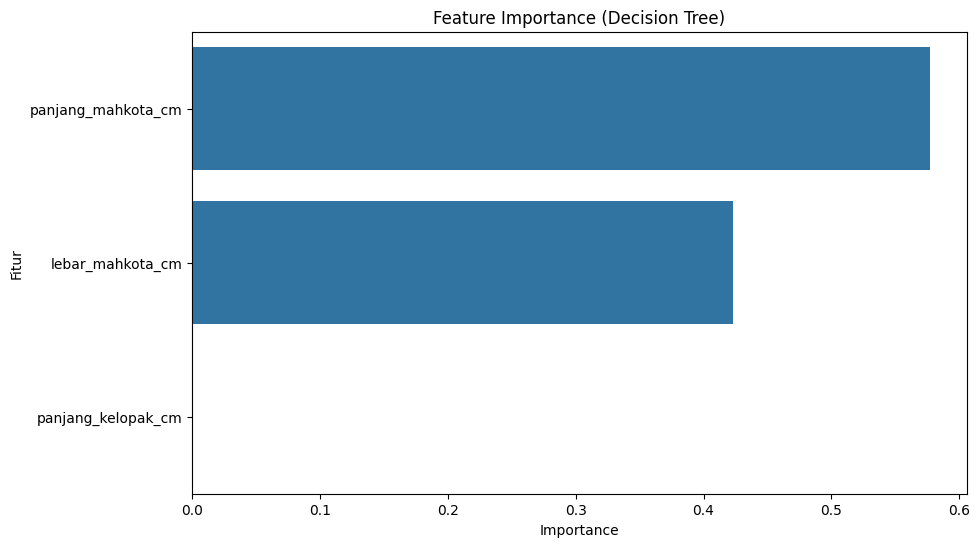

,0
panjang_mahkota_cm,0.577164
lebar_mahkota_cm,0.422836
panjang_kelopak_cm,0.000000


In [21]:
imp = pd.Series(dt.feature_importances_, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=imp, y=imp.index)
plt.title('Feature Importance (Decision Tree)')
plt.xlabel('Importance')
plt.ylabel('Fitur')
plt.show()

imp

In [22]:
scores = {}
for d in range(2, nine :=9):
  m = DecisionTreeClassifier(max_depth=d, random_state=42)
  m.fit(X_train, y_train)
  scores[d] = accuracy_score(y_test, m.predict(X_test))

scores
best_d = max(scores, key=scores.get)
print("Best max_depth:", best_d,"| Acc:", round(scores[best_d]*100,2), "%")

Best max_depth: 3 | Acc: 96.67 %
